In [128]:
%matplotlib inline
import cPickle as pkl
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
dataset = pkl.load(open('dataset.pkl', 'rb'))

In [133]:
bots = [u for u in dataset.keys() if "-bot" == str(u)[-4:]]

In [134]:
from hmmlearn import hmm

In [142]:
hmmdata = [dataset[u] for u in dataset.keys() if "bot" not in str(u)]

In [143]:
hmmdata = [h for h in hmmdata if 150 > len(h) and len(h) > 140]

In [144]:
len(hmmdata)

802

In [145]:
lens = [len(h) for h in hmmdata]

In [146]:
hmmdata = [[h for h in x] for x in hmmdata]

In [150]:
X = np.concatenate(hmmdata)

In [151]:
set(list(X))

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27}

In [113]:
# from sklearn.preprocessing import LabelEncoder
# v = LabelEncoder()
# v.fit(X)

LabelEncoder()

In [149]:
# X = []
# for h in hmmdata:
#     X.append(v.transform(h))

ValueError: y contains new labels: [1]

In [152]:
n_components = 3

In [119]:
# X = np.concatenate(X)

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [154]:
model = hmm.MultinomialHMM(n_components=n_components)

In [155]:
model.fit(np.atleast_2d(X).T,lens)

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=3,
        n_iter=10, params='ste',
        random_state=<mtrand.RandomState object at 0x11192a730>,
        startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=False)

In [127]:
model.emissionprob_

array([[  1.09859380e-03,   3.33888149e-02,   8.40527125e-03,
          3.98233613e-02,   1.02919623e-02,   1.88436371e-02,
          2.48119695e-01,   6.58210406e-02,   2.76990644e-04,
          1.50909479e-02,   1.26562652e-03,   8.16174628e-02,
          5.64670428e-02,   2.38092153e-04,   9.45792276e-05,
          1.15694104e-02,   1.64089330e-02,   2.56486315e-03,
          2.98996887e-03,   1.00268500e-02,   9.31345190e-02,
          1.05276781e-01,   6.10300380e-03,   1.04613698e-02,
          8.38104044e-02,   1.81934446e-02,   5.86173335e-02],
       [  2.62774165e-03,   6.92689117e-02,   1.89970909e-04,
          7.94634035e-03,   9.37994145e-03,   4.62999392e-02,
          8.00703910e-02,   8.81461304e-02,   1.87063879e-02,
          2.22060036e-02,   4.19632699e-03,   1.01307072e-01,
          6.73337539e-02,   3.39707700e-04,   2.57145097e-04,
          7.23352385e-03,   3.54299044e-03,   1.82718869e-03,
          2.26849830e-03,   6.40108063e-02,   8.22574262e-02,
       

In [188]:
label_encodings = ['MemberEvent_same',
 'PublicEvent_same',
 'PullRequestReviewCommentEvent_same',
 'ForkEvent_same',
 'GollumEvent_same',
 'ReleaseEvent_same',
 'PullRequestEvent_same',
 'IssueCommentEvent_same',
 'PushEvent_same',
 'DeleteEvent_same',
 'CommitCommentEvent_same',
 'WatchEvent_same',
 'IssuesEvent_same',
 'CreateEvent_same',
 'MemberEvent_diff',
 'PublicEvent_diff',
 'PullRequestReviewCommentEvent_diff',
 'ForkEvent_diff',
 'GollumEvent_diff',
 'ReleaseEvent_diff',
 'PullRequestEvent_diff',
 'IssueCommentEvent_diff',
 'PushEvent_diff',
 'DeleteEvent_diff',
 'CommitCommentEvent_diff',
 'WatchEvent_diff',
 'IssuesEvent_diff',
 'CreateEvent_diff']

In [189]:
len(label_encodings)

28

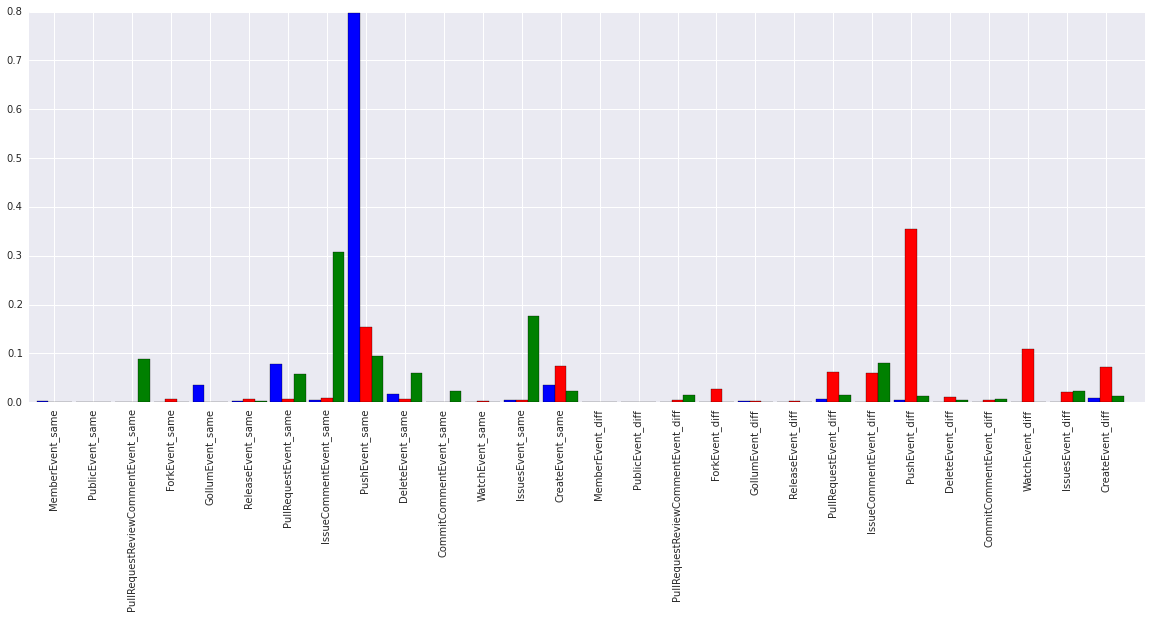

In [193]:
xcoords = np.arange(28)
plt.figure(figsize=(20,7))
ax = plt.subplot(111)

ax.bar(xcoords-.3, model.emissionprob_[0], width=.3, color='b')
ax.bar(xcoords, model.emissionprob_[1], width=.3, color='r')
ax.bar(xcoords+.3, model.emissionprob_[2], width=.3, color='g')
ax.set_xticklabels(label_encodings, rotation='vertical')

plt.xlim([-.5,28])
plt.xticks(np.arange(0,29)+.15)

plt.show()
